<a href="https://colab.research.google.com/github/SevdeSalkim/TensorFlow_Fundamentals/blob/master/01_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import datetime
import numpy as np
import matplotlib.pyplot as plt

## TensorFlow ile modelleme adımları
* Creating a model -  bir sinir ağı modelinin katmanlarını kendiniz birleştirin (Fonksiyonel veya Sıralı API kullanarak) veya daha önceden oluşturulmuş bir modeli içe aktarın (transfer öğrenme olarak bilinir).
* Compiling a model - bir modelin performansının nasıl ölçüleceğini belirleme (loss/metrics) ve nasıl iyileştirileceğini tanımlama (optimizer).
* Fitting a model - modelin verideki desenleri bulmaya çalışmasına izin verme (X'den y'ye nasıl ulaşır).

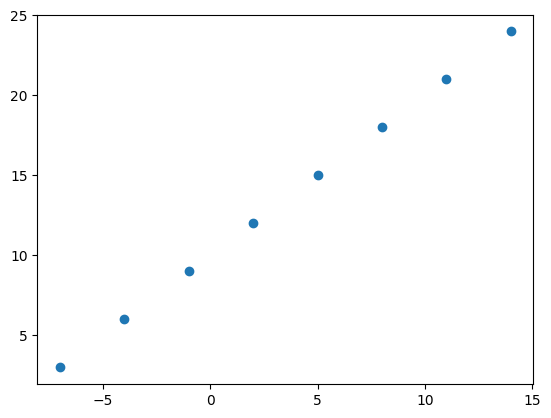

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
X[0], y[0]

(-7.0, 3.0)

Bu kod, TensorFlow kütüphanesini kullanarak basit bir regresyon modeli oluşturur ve eğitir. Model, tek bir yoğun (dense) katmandan oluşur. Eğitim verisi X ve etiketleri y kullanılarak model eğitilir. Eğitim süresince kullanılan loss (kayıp) fonksiyonu olarak ortalama mutlak hata (Mean Absolute Error - MAE) seçilir ve eğitim için stokastik gradyan inişi (Stochastic Gradient Descent - SGD) optimizasyon algoritması kullanılır. Eğitim süresince ortalama mutlak hata (MAE) metriği de izlenir.

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 367ms/step - loss: 13.4782 - mae: 13.4782
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.3457 - mae: 13.3457
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2132 - mae: 13.2132
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 13.0807 - mae: 13.0807
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 12.9482 - mae: 12.9482
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 12.8157 - mae: 12.8157
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6832 - mae: 12.6832
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5507 - mae: 12.5507
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4182 - mae: 12.4182
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2857 - mae: 12.2857
Epoch 11/100
1/1 [==============================

In [ ]:
X , y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 104ms/step


array([[29.535717]], dtype=float32)

# Sinir ağları oluştururken uygulayacağınız tipik bir iş akışı şöyledir:
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

In [ ]:
X = np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
y = np.arange(-90 , 110 ,4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
y = X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
len(X)

50

## Split data into training/test set

In [ ]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test)

(40, 10)

## Visualizing the data

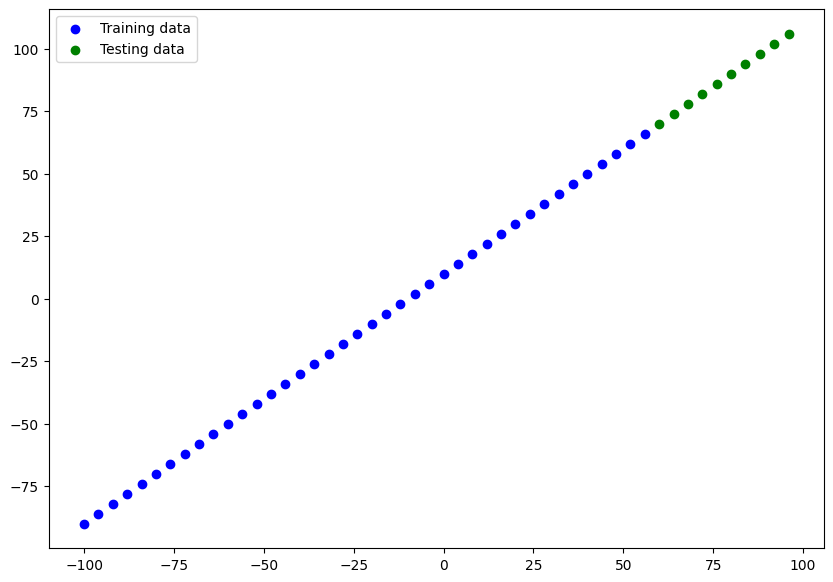

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")

plt.scatter(X_test, y_test, c="g", label = "Testing data")
plt.legend();

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


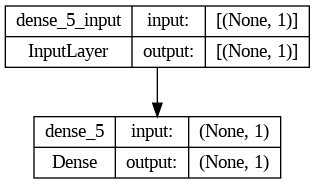

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Visualizing the predictions

In [ ]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 25ms/step


array([[43.845   ],
       [46.624878],
       [49.404755],
       [52.184628],
       [54.964504],
       [57.744377],
       [60.524254],
       [63.30413 ],
       [66.08401 ],
       [68.863884]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

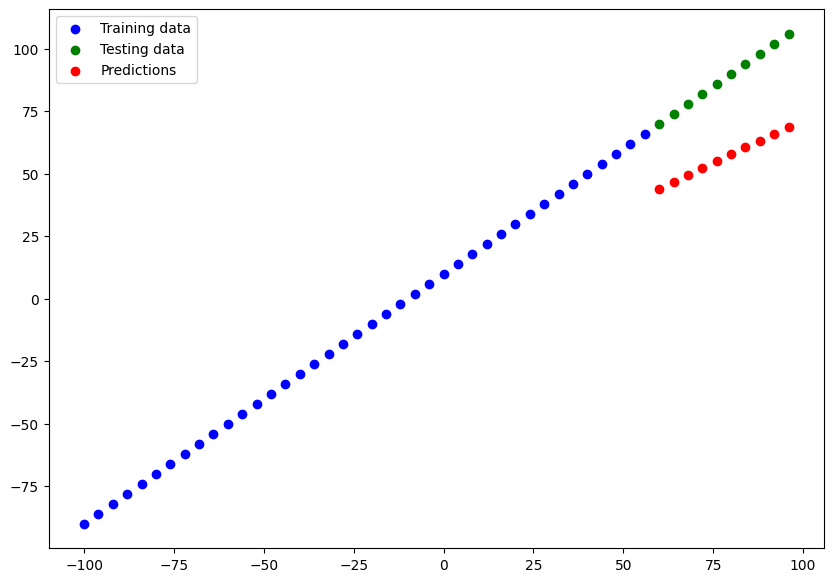

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

## Evaluating predictions

Regresyon problemleri için kullanılan ana ölçümlerden ikisi şunlardır:

* Ortalama mutlak hata (MAE) - tahminlerin her biri arasındaki ortalama fark.
* Ortalama kare hata (MSE) - tahminler arasındaki kare ortalama fark (daha büyük hataların küçük hatalardan daha zararlı olması durumunda kullanın).


Bu değerlerin her biri ne kadar düşük olursa o kadar iyidir.

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 395ms/step - loss: 31.6456 - mae: 31.6456


[31.645557403564453, 31.645557403564453]

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([44.155   , 41.375122, 38.595245, 35.815372, 33.035496, 30.255621,
       27.475744, 24.69587 , 21.915993, 19.136116], dtype=float32)>

###MAE'nin tek bir çıktı olması gerekiyor.

bunun nedeni bizim y_test ve y_preds tensörlerimizin farklı şekillerde olmasıdır


In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
y_preds

array([[43.845   ],
       [46.624878],
       [49.404755],
       [52.184628],
       [54.964504],
       [57.744377],
       [60.524254],
       [63.30413 ],
       [66.08401 ],
       [68.863884]], dtype=float32)

In [ ]:
y_test.shape , y_preds.shape

((10,), (10, 1))

In [ ]:
y_preds.squeeze().shape # tensörlerimizin aynı olması için sıkıştırma yapıldı.

(10,)

In [ ]:
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([43.845   , 46.624878, 49.404755, 52.184628, 54.964504, 57.744377,
        60.524254, 63.30413 , 66.08401 , 68.863884], dtype=float32))

In [ ]:
mae =tf.metrics.mean_absolute_error(y_true = y_test,
                                    y_pred = y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=31.645557>

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1013.72314>

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Bir modeli geliştirmek için denemeler yürütme
* Daha fazla veri alın - modelinizin üzerinde eğitim alabileceği daha fazla örnek alın (örüntüleri öğrenmek için daha fazla fırsat).
* Modelinizi büyütün (daha karmaşık bir model kullanın) - bu, daha fazla katman veya her katmanda daha fazla gizli birim şeklinde olabilir.
* Daha uzun süre eğitim alın - modelinize verilerdeki kalıpları bulma şansı verin.

## Model_1
orijinal modelle aynı, 1 katman, 100 epoch eğitilmiş.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 41.3337 - mae: 41.3337
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 12.6295 - mae: 12.6295
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2215 - mae: 11.2215
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.6112 - mae: 9.6112
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.5257 - mae: 10.5257
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.7466 - mae: 9.7466
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.8360 - mae: 8.8360
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0749 - mae: 9.0749
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.4004 - mae: 19.4004
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.4812 - mae: 10.4812
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - 

1/1 [==============================] - 0s 56ms/step


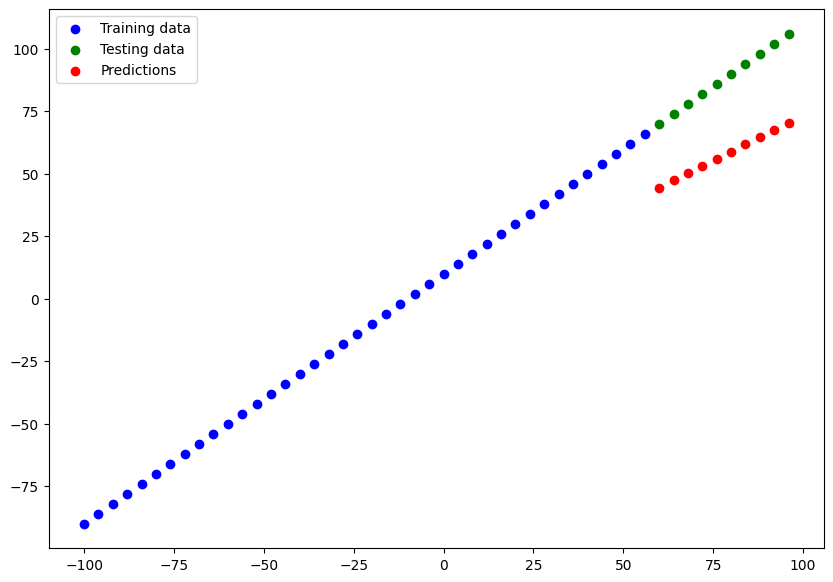

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(30.571156, 944.9691)

## Model_2
2 katman 250  epoch

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=250, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 54ms/step


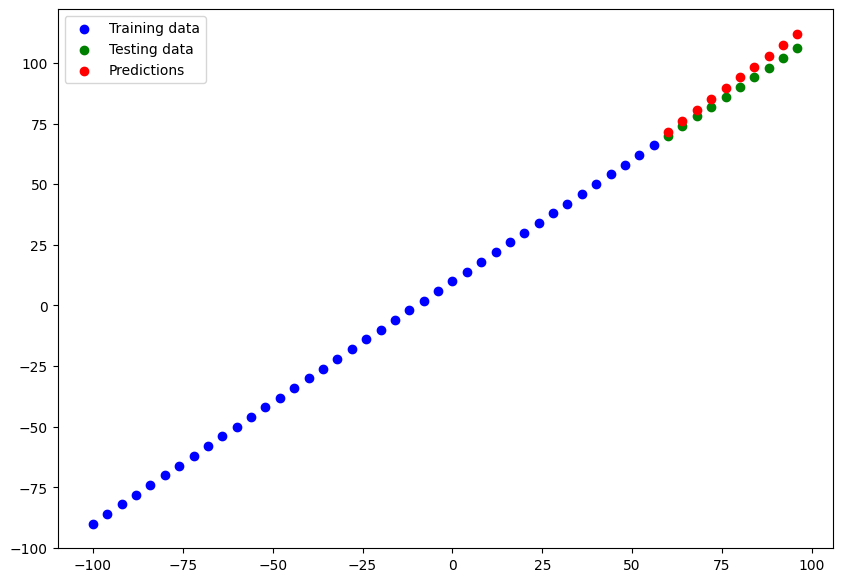

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(3.7346885, 16.038647)

## Model_3
2 katman, 500 epoch

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 158ms/step


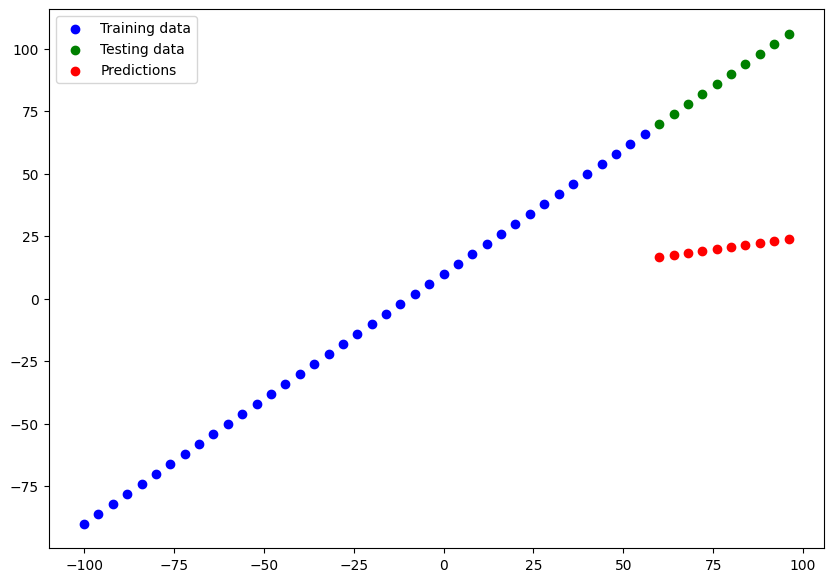

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.66337, 4662.4673)

## Sonuçları karşılaştırma

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.571156,944.969116
1,model_2,3.734689,16.038647
2,model_3,67.663368,67.663368


## Modeli Kaydetmek
Bir modeli TensorFlow'a kaydetmenin iki yolu vardır:
* The SavedModel format (default).
* The HDF5 format.

In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


##Modeli Yükleme


In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
